In [1]:
import os, time
import numpy as np
import pandas as pd
import config.hyperparams as hp
from tqdm.notebook import trange, tqdm
from entities.solver_process_ns import SolverProcessNS
from lib.common import disarrange
import powerlaw
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from multiprocessing import Queue
from lib import wlanlrz_loader, rtt_matrix_loader, inference_loader, solver

### WLAN-LRZ AP Data Loader ####
desc = wlanlrz_loader.load_data_description(hp.AP_DESCR)
original_data, coord_dataframe_list, total_ap, original_merged_raw_ap_data = \
wlanlrz_loader.load_data_parallel(hp.BUILDING, desc, mass_load=True)

Parallel loading of APs data ...
Activating threads now


 17%|█▋        | 1/6 [00:00<00:00,  7.01it/s]]

 21%|██        | 4/19 [00:01<00:04,  3.47it/s]

File not found!


100%|██████████| 1/1 [00:00<00:00,  1.77it/s]]

File not found!


 10%|█         | 4/39 [00:01<00:11,  2.92it/s]



  9%|▉         | 5/56 [00:01<00:18,  2.71it/s]

 17%|█▋        | 6/35 [00:02<00:11,  2.49it/s]

File not found!


  0%|          | 0/13 [00:00<?, ?it/s]66it/s]]

 38%|███▊      | 3/8 [00:01<00:02,  1.92it/s]]

File not found!


 80%|████████  | 4/5 [00:02<00:00,  1.86it/s]]]


File not found!


  5%|▌         | 2/40 [00:00<00:17,  2.14it/s]

File not found!


 14%|█▍        | 8/56 [00:03<00:24,  1.94it/s]

File not found!



  0%|          | 0/2 [00:00<?, ?it/s]1.89it/s]

File not found!


  3%|▎         | 1/29 [00:00<00:15,  1.76it/s]

File not found!


 36%|███▋      | 8/22 [00:03<00:07,  1.82it/s]

File not found!


 27%|██▋       | 3/11 [00:01<00:04,  1.67it/s]

File not found!


 24%|██▍       | 9/37 [00:03<00:14,  1.87it/s]]

File not found!


100%|██████████| 1/1 [00:00<00:00,  1.23it/s]]s]

 17%|█▋        | 1/6 [00:00<00:03,  1.38it/s]

File not found!


 21%|██        | 11/53 [00:05<00:28,  1.50it/s]

File not found!


 67%|██████▋   | 2/3 [00:01<00:00,  1.32it/s]]]

File not found!


 46%|████▌     | 6/13 [00:04<00:05,  1.34it/s]s]

File not found!


 25%|██▌       | 1/4 [00:00<00:02,  1.16it/s]]]

 39%|███▊      | 12/31 [00:06<00:13,  1.40it/s]

File not found!


  0%|          | 0/32 [00:00<?, ?it/s]1.88it/s]

File not found!


 18%|█▊        | 4/22 [00:03<00:14,  1.25it/s]

File not found!


 18%|█▊        | 4/22 [00:03<00:14,  1.27it/s]]

File not found!


  8%|▊         | 12/152 [00:06<01:50,  1.27it/s]

File not found!


  0%|          | 0/12 [00:00<?, ?it/s]1.32it/s]

File not found!


  0%|          | 0/8 [00:00<?, ?it/s]1.28it/s]]

File not found!


  4%|▍         | 2/45 [00:01<00:39,  1.08it/s]]]

File not found!


 27%|██▋       | 6/22 [00:05<00:14,  1.11it/s]]

File not found!


 36%|███▋      | 8/22 [00:06<00:11,  1.17it/s]s]

File not found!


  0%|          | 0/4 [00:00<?, ?it/s].08it/s]]]

File not found!


  4%|▍         | 1/25 [00:00<00:21,  1.10it/s]

 19%|█▉        | 10/53 [00:08<00:39,  1.08it/s]

100%|██████████| 16/16 [00:11<00:00,  1.40it/s]

File not found!


 61%|██████    | 14/23 [00:10<00:08,  1.03it/s]

File not found!


 59%|█████▉    | 10/17 [00:08<00:06,  1.10it/s]

 22%|██▏       | 2/9 [00:02<00:07,  1.02s/it]s]

File not found!


100%|██████████| 11/11 [00:10<00:00,  1.01s/it]


File not found!


  0%|          | 0/6 [00:00<?, ?it/s]1.01it/s]

 78%|███████▊  | 18/23 [00:15<00:05,  1.06s/it]

File not found!


100%|██████████| 4/4 [00:04<00:00,  1.08s/it]]]

File not found!


100%|██████████| 7/7 [00:06<00:00,  1.04it/s]]

100%|██████████| 4/4 [00:04<00:00,  1.09s/it]]]

File not found!


 55%|█████▌    | 11/20 [00:11<00:09,  1.07s/it]

 48%|████▊     | 12/25 [00:12<00:14,  1.10s/it]

File not found!


 86%|████████▋ | 19/22 [00:18<00:03,  1.11s/it]

 75%|███████▌  | 3/4 [00:03<00:01,  1.15s/it]

File not found!


100%|██████████| 15/15 [00:15<00:00,  1.02s/it]

File not found!


100%|██████████| 13/13 [00:14<00:00,  1.08s/it]

File not found!


100%|██████████| 6/6 [00:03<00:00,  1.89it/s]]]

100%|██████████| 10/10 [00:10<00:00,  1.02s/it]

File not found!


 18%|█▊        | 28/152 [00:23<02:14,  1.09s/it]

File not found!


100%|██████████| 1/1 [00:00<00:00,  1.08it/s]s]

100%|██████████| 17/17 [00:18<00:00,  1.08s/it]

File not found!


 37%|███▋      | 21/57 [00:21<00:35,  1.02it/s]

100%|██████████| 37/37 [00:31<00:00,  1.18it/s]

 64%|██████▎   | 7/11 [00:06<00:03,  1.24it/s]]

File not found!


 35%|███▌      | 11/31 [00:09<00:15,  1.31it/s]

File not found!


 45%|████▍     | 21/47 [00:20<00:19,  1.31it/s]

File not found!


 36%|███▋      | 12/33 [00:10<00:15,  1.34it/s]

 71%|███████   | 37/52 [00:32<00:09,  1.59it/s]

File not found!



 61%|██████    | 42/69 [00:33<00:10,  2.68it/s]

File not found!


 68%|██████▊   | 47/69 [00:36<00:07,  2.88it/s]

 94%|█████████▍| 49/52 [00:36<00:01,  2.98it/s]]

File not found!


100%|██████████| 56/56 [00:39<00:00,  1.41it/s]

100%|██████████| 152/152 [00:49<00:00,  3.10it/s]


In [2]:
from lib.common import generate_agents, generate_edge_nodes

T1_RATIO_VEC_ABS = np.array([100])
T2_RATIO_VEC_ABS = np.array([50])
T3_RATIO_VEC_ABS = np.array([2])

target_ma = 1000

RESULTS = []

print("Total APs: {}".format(total_ap))
original_data['timestamp'] = original_data.index

data = original_data[(original_data.total >= target_ma) & (original_data.total < (target_ma*1.1))].sample()
merged_raw_ap_data = original_merged_raw_ap_data[original_merged_raw_ap_data.index.isin(data.index)]
merged_raw_ap_data = merged_raw_ap_data.loc[:, (merged_raw_ap_data > 0).all()]

MA = int(data.total)
total_ap = len(merged_raw_ap_data.columns)

TIER_1_EN = T1_RATIO_VEC_ABS[0]
TIER_2_EN = T2_RATIO_VEC_ABS[0]
TIER_3_EN = T3_RATIO_VEC_ABS[0]

EN_RATIO = (TIER_1_EN, TIER_2_EN, TIER_3_EN)
TOTAL_EN = int(TIER_1_EN + TIER_2_EN + TIER_3_EN)

if hp.dataset_rtt:
    ### LOAD LATENCY MATRIX FROM DATASET ###
    print("Loading rtt matrix from dataset")
    clf = rtt_matrix_loader.analyze_data(source=hp.dataset_rtt, drange=1000, threshold=250, k=3)
    clf.weights_ = [0.2, 0.2, 0.6]
    rtt_matrix = rtt_matrix_loader.generate_data(clf, n=total_ap, m=TOTAL_EN)
else:
    # Prepare latency matrixes for all the EN classes with increasing latency based on distance from the edge 
    rtt_matrix_en_t1 = np.round(abs(np.random.normal(1, 0.2, (TIER_1_EN, TIER_1_EN))))
    rtt_matrix_en_t2 = np.round(abs(np.random.normal(3, 1, (TIER_1_EN, TIER_2_EN))))
    rtt_matrix_en_t3 = np.round(abs(np.random.normal(10, 1, (TIER_1_EN, TIER_3_EN))))

    sns.distplot(rtt_matrix_en_t1.flatten(), hist=False, rug=True)
    sns.distplot(rtt_matrix_en_t2.flatten(), hist=False, rug=True)
    sns.distplot(rtt_matrix_en_t3.flatten(), hist=False, rug=True)

    rtt_matrix = np.hstack([rtt_matrix_en_t1, rtt_matrix_en_t2, rtt_matrix_en_t3])

disarrange(rtt_matrix, axis=0)

for i in range(np.minimum(rtt_matrix.shape[0], rtt_matrix.shape[1])):
    rtt_matrix[i][i] = 1

Total APs: 4371
Loading rtt matrix from dataset


In [3]:
thread_nr = 5

## Tier 1
t1_list = np.zeros(thread_nr, dtype=np.int)
# add = np.floor(len(a)/thread_nr)
for i in range(TIER_1_EN):
    t1_list[i % thread_nr] += 1
    
## Tier 2
t2_list = np.zeros(thread_nr, dtype=np.int)
# add = np.floor(6/len(a))
for i in range(TIER_2_EN):
    t2_list[i % thread_nr] += 1
    
## Tier 3
t3_list = np.zeros(thread_nr, dtype=np.int)
# add = np.floor(6/len(t3_list))
for i in range(TIER_3_EN):
    t3_list[i % thread_nr] += 1

In [4]:
from multiprocessing import Queue
from entities.en_tier import Tier
import time 

dim = 0
iterations = 100

FPS = [10, 10, 10]
k = [0,5,0]
greed = [False, True, False]
cloud = [False, False, True]
alpha = [0.7, 1, 0.7]
beta = [0.3, 0, 0.3]
RESULT = []

for j in range(len(FPS)):
    print("Set: {}".format(j))
    hp.FPS = np.random.normal(FPS[j], 2, 50)
    hp.local_search_scope = k[j]
    hp.greedy = greed[j]
    hp.alpha = alpha[j]
    hp.beta = beta[j]
    
    gb = merged_raw_ap_data.groupby(np.arange(merged_raw_ap_data.shape[1]) // (merged_raw_ap_data.shape[1]/thread_nr), axis=1)
    mapls = [group for _, group in gb]
    
    for i in range(iterations):
        processes = []
        result_queue = Queue(maxsize=0)
    
        for nt1,nt2,nt3,ml in zip(t1_list, t2_list, t3_list, mapls):
            en_rat = (nt1, nt2, nt3)
            agents = generate_agents(MA, ml, dim)
            edge_nodes_l = generate_edge_nodes(en_rat, ml, dim)

            t = SolverProcessNS(result_queue, agents, edge_nodes_l, rtt_matrix, ml, cloud[j])

            processes.append(t)
            t.start()

        while 1:
            time.sleep(0.01)
            running = any(p.is_alive() for p in processes)
            while not result_queue.empty():
                s = result_queue.get()
                RESULT.append(s)
            if not running:
                break
        
#         print("Iteration: {}".format(i))

Set: 0
Set: 1
Set: 2


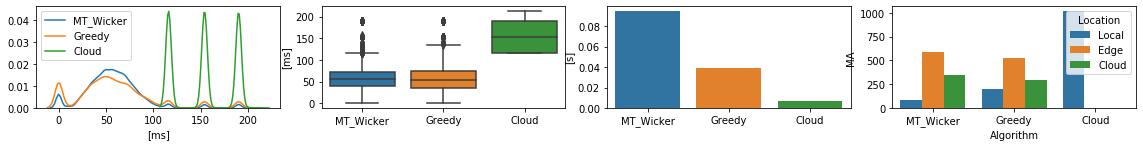

In [5]:
from entities.mobile_agent import Offloaded

fig, ax = plt.subplots(1, 4, figsize=(16, 2), constrained_layout=False)
fig.tight_layout()

agents_ls = []
list_of_groups2 = zip(*(iter(RESULT),) * (iterations*thread_nr))
LABELS = ["MT_Wicker", "Greedy", "Cloud"]

lat_list = []
conv_list = []
df = pd.DataFrame(columns=['Algorithm', 'MA', 'Location'])

## Latency
for i, gr in enumerate(list_of_groups2):
    curr_lat = list(map(lambda a: a.total_latency(), np.concatenate(list(map(lambda z: z[1], gr)))))
    
    #powerlaw.plot_cdf(data=curr_lat, ax=ax[0], label=label)
    sns.distplot(curr_lat, hist=False, ax=ax[0], label=LABELS[i])

    lat_list.append(curr_lat)
    conv_list.append(np.median(list(map(lambda b: b[3], gr))))
    
    agents = np.concatenate(list(map(lambda z: z[1], gr))) 
    
    loc = len(list(filter(lambda a: a.offload_target == Offloaded.Local ,agents))) / iterations
    edge = len(list(filter(lambda a: a.offload_target == Offloaded.Edge ,agents))) / iterations
    cloud = len(list(filter(lambda a: a.offload_target == Offloaded.Cloud ,agents))) / iterations

    df = df.append({'Algorithm': LABELS[i], 'MA': loc, 'Location': 'Local'}, ignore_index=True) \
        .append({'Algorithm': LABELS[i], 'MA': edge, 'Location': 'Edge'}, ignore_index=True) \
        .append({'Algorithm': LABELS[i], 'MA': cloud, 'Location': 'Cloud'}, ignore_index=True)
    
sns.boxplot(x=LABELS, y=lat_list, ax=ax[1])
sns.barplot(x=LABELS, y=conv_list, ax=ax[2])
g = sns.barplot(x="Algorithm", y="MA", hue="Location", data=df, ax=ax[3])

#g.text(2,10,4, color='red', ha="center")

ax[0].set_xlabel("[ms]")
ax[1].set_ylabel("[ms]")
ax[2].set_ylabel("[s]")

fig.subplots_adjust(hspace=0.2)
fig.savefig("../plots/multithread/comparison.pdf",  bbox_inches="tight")

In [124]:
from multiprocessing import Queue
from entities.en_tier import Tier

dim = 0
iterations = 50
    
k = [1,5,10,15,0]
LABELS = [1, 5, 10, 15, TOTAL_EN/thread_nr]
result_kl = []

hp.FPS = np.random.normal(10, 2, 50)
hp.greedy = False
hp.alpha = 0.7
hp.beta = 0.3

for ke in k:
    hp.local_search_scope = ke
    print("κ: {}".format(ke))
    
    gb = merged_raw_ap_data.groupby(np.arange(merged_raw_ap_data.shape[1]) // (merged_raw_ap_data.shape[1]/thread_nr), axis=1)
    mapls = [group for _, group in gb]

    for i in range(iterations):
        ## Network partitioning
        processes = []
        result_queue = Queue(maxsize=0)

        for nt1,nt2,nt3,ml in zip(t1_list, t2_list, t3_list, mapls):
            en_rat = (nt1, nt2, nt3)
            agents = generate_agents(MA, ml, dim)
            edge_nodes_l = generate_edge_nodes(en_rat, ml, dim)

            t = SolverProcessNS(result_queue, agents, edge_nodes_l, rtt_matrix, ml)

            processes.append(t)
            t.start()

        while 1:
            time.sleep(0.01)
            running = any(p.is_alive() for p in processes)
            while not result_queue.empty():
                s = result_queue.get()
                result_kl.append(s)
            if not running:
                break

κ: 1
κ: 5
κ: 10
κ: 15
κ: 0


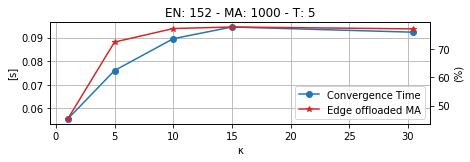

In [125]:
list_of_groups = zip(*(iter(result_kl),) * (iterations*thread_nr))

conv_time = []
cov = []

fig, ax = plt.subplots(1, 1, figsize=(6, 2), constrained_layout=False)
fig.tight_layout()

for re in list_of_groups:
    conv_time.append(np.median(list(map(lambda b: b[3], re))))
    
    agents = np.concatenate(list(map(lambda z: z[1], re))) 
    cov.append(len(list(filter(lambda a: a.offload_target == Offloaded.Edge ,agents))) / iterations / target_ma * 100)

    
ax.plot(LABELS, conv_time, marker="o", label="Convergence Time")
ax.set_ylabel("[s]")
ax.set_xlabel("κ")
ax.set_title("EN: {} - MA: {} - T: {}".format(TOTAL_EN, target_ma, thread_nr))
ax.grid()

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('(%)')  # we already handled the x-label with ax1
ax2.plot(LABELS, cov, marker="*", color=color, label="Edge offloaded MA")
ax2.tick_params(axis='y')

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc=4)

fig.savefig("../plots/multithread/kappa_tradeoff.pdf",  bbox_inches="tight")

In [9]:
iterations = 50
thread_nr = [1,2,4,6,8,10]

hp.FPS = np.random.normal(10, 2, 50)
hp.greedy = False
hp.alpha = 0.7
hp.beta = 0.3
hp.local_search_scope = 0

RESULT_MT = []

for tnr in thread_nr:
    
    print("Threads: {}".format(tnr))

    ## Tier 1
    t1_list = np.zeros(tnr, dtype=np.int)
    # add = np.floor(len(a)/thread_nr)
    for i in range(TIER_1_EN):
        t1_list[i % tnr] += 1

    ## Tier 2
    t2_list = np.zeros(tnr, dtype=np.int)
    # add = np.floor(6/len(a))
    for i in range(TIER_2_EN):
        t2_list[i % tnr] += 1

    ## Tier 3
    t3_list = np.zeros(tnr, dtype=np.int)
    # add = np.floor(6/len(t3_list))
    for i in range(TIER_3_EN):
        t3_list[i % tnr] += 1
        
    gb = merged_raw_ap_data.groupby(np.arange(merged_raw_ap_data.shape[1]) // (merged_raw_ap_data.shape[1]/tnr), axis=1)
    mapls = [group for _, group in gb]
    
    for i in range(iterations):
        processes = []
        result_queue = Queue(maxsize=0)
    
        for nt1,nt2,nt3,ml in zip(t1_list, t2_list, t3_list, mapls):
            en_rat = (nt1, nt2, nt3)
            agents = generate_agents(MA, ml, dim)
            edge_nodes_l = generate_edge_nodes(en_rat, ml, dim)

            t = SolverProcessNS(result_queue, agents, edge_nodes_l, rtt_matrix, ml, False)

            processes.append(t)
            t.start()

        while 1:
            time.sleep(0.01)
            running = any(p.is_alive() for p in processes)
            while not result_queue.empty():
                s = result_queue.get()
                RESULT_MT.append(s)
            if not running:
                break

Threads: 1
Threads: 2
Threads: 4
Threads: 6
Threads: 8
Threads: 10


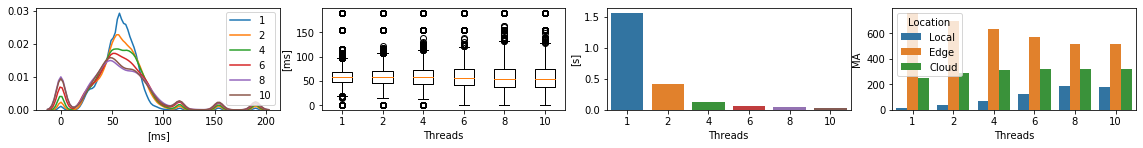

In [10]:
from entities.mobile_agent import Offloaded

fig, ax = plt.subplots(1, 4, figsize=(16, 2), constrained_layout=False)
fig.tight_layout()

agents_ls = []
lmt = []
marker = 0

df = pd.DataFrame(columns=['Threads', 'MA', 'Location'])

for trn in thread_nr:
    lmt.append(RESULT_MT[marker:(marker+(trn*iterations))])
    marker = marker+trn*iterations

lat_list = []
conv_list = []

## Latency
for i, elem in enumerate(lmt):
    curr_lat = list(map(lambda a: a.total_latency(), np.concatenate(list(map(lambda z: z[1], elem)))))
    
    #powerlaw.plot_cdf(data=curr_lat, ax=ax[0], label=label)
    sns.distplot(curr_lat, hist=False, ax=ax[0], label=thread_nr[i])

    lat_list.append(curr_lat)
    conv_list.append(np.median(list(map(lambda b: b[3], elem))))
    
    agents = np.concatenate(list(map(lambda z: z[1], elem))) 

    loc = len(list(filter(lambda a: a.offload_target == Offloaded.Local ,agents))) / iterations
    edge = len(list(filter(lambda a: a.offload_target == Offloaded.Edge ,agents))) / iterations
    cloud = len(list(filter(lambda a: a.offload_target == Offloaded.Cloud ,agents))) / iterations

    df = df.append({'Threads': thread_nr[i], 'MA': loc, 'Location': 'Local'}, ignore_index=True) \
        .append({'Threads': thread_nr[i], 'MA': edge, 'Location': 'Edge'}, ignore_index=True) \
        .append({'Threads': thread_nr[i], 'MA': cloud, 'Location': 'Cloud'}, ignore_index=True)

sns.barplot(x=thread_nr, y=conv_list, ax=ax[2], label=thread_nr)
sns.barplot(x="Threads", y="MA", hue="Location", data=df, ax=ax[3])
# sns.boxplot(thread_nr, lat_list, ax=ax[1])
ax[1].boxplot(lat_list, labels=thread_nr)
#g.text(2,10,4, color='red', ha="center")

ax[0].set_xlabel("[ms]")
ax[1].set_ylabel("[ms]")

ax[1].set_xlabel("Threads")
ax[2].set_xlabel("Threads")
ax[2].set_ylabel("[s]")

fig.subplots_adjust(hspace=0.2)
fig.savefig("../plots/multithread/threads_scaling.pdf",  bbox_inches="tight")

In [8]:
df

,Threads,MA,Location
0,2,42.64,Local
1,2,693.82,Edge
2,2,283.54,Cloud
3,4,71.86,Local
4,4,632.98,Edge
5,4,315.16,Cloud
6,6,128.02,Local
7,6,565.26,Edge
8,6,326.72,Cloud
9,8,179.78,Local


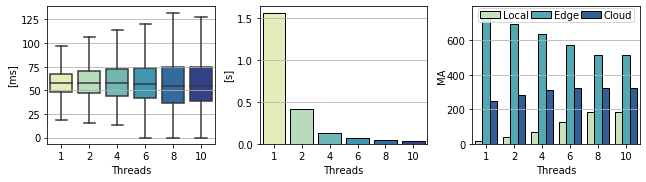

In [36]:
fig,axs = plt.subplots(1,3,figsize=(9,2.5), constrained_layout=False)
fig.tight_layout()

sns.boxplot(x=thread_nr, y=lat_list, ax=axs[0], showfliers=False, palette="YlGnBu")
sns.barplot(x=thread_nr, y=conv_list, ax=axs[1], palette="YlGnBu", edgecolor="black")
sns.barplot(x="Threads", y="MA", hue="Location", data=df, ax=axs[2], palette="YlGnBu", edgecolor="black")

axs[2].legend(ncol=3,borderpad=0.2, loc=9,
                labelspacing=0.1, handletextpad=0.3,
                borderaxespad=0.15, columnspacing=0.2)
for ax in axs:
    ax.grid(axis='y')

axs[2].set_ylabel('Mobile Agents', labelpad=-0.6)

axs[0].set_xlabel("Threads")
axs[0].set_ylabel("[ms]")

axs[1].set_xlabel("Threads")
axs[1].set_ylabel("[s]")

axs[2].set_xlabel("Threads")
axs[2].set_ylabel("MA")

fig.savefig("../plots/multithread/threads_scaling_compact.pdf",  bbox_inches="tight")

In [85]:
## This will change the style of the plots a bit
import matplotlib

plt.style.use('classic')

matplotlib.rcParams['axes.facecolor'] = 'w'
matplotlib.rcParams['axes.edgecolor'] = 'k'
matplotlib.rcParams['figure.facecolor'] = 'w'
matplotlib.rcParams['axes.titlesize'] = 22
matplotlib.rcParams['axes.labelsize'] = 22
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['lines.markersize'] = 3
matplotlib.rcParams['lines.color'] = 'xkcd:blue'
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20

width = 7
height = width / 1.618

# Use matplotlib fonts
matplotlib.rcParams['text.usetex']=True

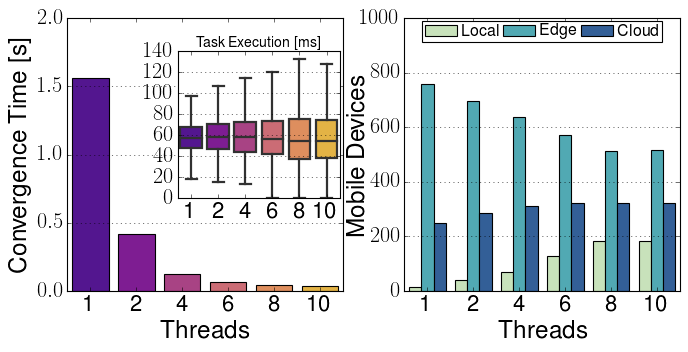

In [101]:
from numpy import median
# weird - too packed
fig,axs = plt.subplots(1,2,figsize=(8.4,4.2), constrained_layout=False)
fig.tight_layout()

sns.barplot(x=thread_nr, y=conv_list, ax=axs[0], palette="plasma", edgecolor="black", estimator=median)
sns.barplot(x="Threads", y="MA", hue="Location", data=df, ax=axs[1], palette="YlGnBu", edgecolor="black")

axs[1].legend(ncol=3,borderpad=0.2, loc=9,
                labelspacing=0.1, handletextpad=0.3,
                borderaxespad=0.15, columnspacing=0.2, title='')

axin1 = axs[0].inset_axes([0.40, 0.34, 0.59, 0.54])
sns.boxplot(x=thread_nr, y=lat_list, ax=axin1, showfliers=False, palette="plasma")

axs[0].set_xlabel("Threads")
axs[0].set_ylabel("Convergence Time [s]")

#axin1.set_ylabel("[ms]")
axin1.grid(axis='y')
axin1.set_title('Task Execution [ms]', fontsize=12.75, pad=3)

axs[0].set_ylim(top=2) 
axs[1].set_ylim(top=1000)
axs[1].set_ylabel('Mobile Devices', labelpad=-9)

for ax in axs:
    ax.grid(axis='y')

plt.tight_layout(pad=0, w_pad=0.3)
    
fig.savefig("../plots/multithread/threads_scaling_inset.pdf",  bbox_inches="tight")